<img src="./images/banner.png" width="800">

# Logistic Regression

Logistic regression is a fundamental classification algorithm in machine learning and statistics. Despite its name, logistic regression is used for binary classification problems, where the goal is to predict one of two possible outcomes. It serves as a cornerstone for understanding more complex classification methods and is widely used in various fields due to its simplicity and interpretability.


Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).


🔑 **Key Concept:** Logistic regression predicts the probability that an instance belongs to a particular class.


<img src="./images/regression-vs-classification.avif" width="800">

<img src="./images/regression-to-classification.png" width="800">

Unlike linear regression, which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value. This probability can then be mapped to two or more discrete classes.


The heart of logistic regression is the logistic function, also known as the sigmoid function. This S-shaped curve can take any real-valued number and map it into a value between 0 and 1.


The logistic function is defined as:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Where:
- $\sigma$ is the sigmoid function
- $z$ is the input to the function (often the linear combination of features and their coefficients)
- $e$ is the base of natural logarithms (Euler's number)


To understand logistic regression, it's helpful to see how it relates to and differs from linear regression:

1. **Linear Regression:** $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
2. **Logistic Regression:** $p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n)}}$

Where:
- $y$ is the predicted output
- $p$ is the predicted probability
- $\beta_0, \beta_1, ..., \beta_n$ are the coefficients
- $x_1, x_2, ..., x_n$ are the input features


<img src="./images/logistic-vs-linear.png" width="800">

Think of logistic regression as taking the output of a linear regression and squeezing it through the sigmoid function to get a probability.


Logistic regression is popular for several reasons:

1. **Interpretability:** The coefficients in logistic regression have a clear interpretation in terms of log-odds.
2. **Efficiency:** It's computationally inexpensive and doesn't require high processing power.
3. **Probabilistic Output:** It provides probabilities rather than just classifications.
4. **No Assumption of Normality:** Unlike linear regression, it doesn't assume a normal distribution of the target variable.


Logistic regression is used in various fields, including:

- **Medicine:** Predicting the likelihood of a disease based on observed characteristics of the patient.
- **Marketing:** Predicting the probability of a customer making a purchase.
- **Finance:** Estimating the probability of a loan default.
- **Politics:** Forecasting election outcomes based on polling data.


While logistic regression is powerful, it's crucial to understand its assumptions and limitations, which we'll explore in later sections.


In summary, logistic regression is a versatile and interpretable method for binary classification problems. It uses the logistic function to model the probability of an outcome based on one or more predictor variables. As we delve deeper into the mathematics and applications of logistic regression, keep in mind its foundational role in the broader landscape of machine learning and statistical modeling.

**Table of contents**<a id='toc0_'></a>    
- [Logistic Regression as a Generalized Linear Model](#toc1_)    
  - [Random Component: Bernoulli Distribution](#toc1_1_)    
  - [Systematic Component: Linear Predictor](#toc1_2_)    
  - [Link Function: Logit Function](#toc1_3_)    
  - [Putting It All Together](#toc1_4_)    
  - [Maximum Likelihood Estimation](#toc1_5_)    
- [Interpreting Logistic Regression Results](#toc2_)    
  - [The Basics: What Are We Predicting?](#toc2_1_)    
  - [Odds and Odds Ratios](#toc2_2_)    
  - [Predicted Probabilities](#toc2_3_)    
- [Model Fitting and Optimization](#toc3_)    
  - [The Optimization Problem](#toc3_1_)    
  - [Gradient Descent for Logistic Regression](#toc3_2_)    
  - [Implementing Logistic Regression with Gradient Descent](#toc3_3_)    
  - [Interpreting the Results](#toc3_4_)    
  - [Tuning Hyperparameters](#toc3_5_)    
  - [Regularization in Practice](#toc3_6_)    
- [Advantages and Limitations of Logistic Regression](#toc4_)    
  - [Advantages of Logistic Regression](#toc4_1_)    
  - [Limitations of Logistic Regression](#toc4_2_)    
  - [When to Use Logistic Regression](#toc4_3_)    
  - [Alternatives to Consider](#toc4_4_)    
- [Summary](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Logistic Regression as a Generalized Linear Model](#toc0_)

Building upon our understanding of Generalized Linear Models (GLMs), we'll now explore how logistic regression fits into this framework. This approach will help us understand the mathematical foundations of logistic regression and its connection to other statistical models.


Logistic regression is a specific case of GLM where the response variable follows a Bernoulli distribution and uses the logit link function. So as discussed in the previous lecture, in the GLM framework, logistic regression consists of three components:

1. Random Component: Bernoulli distribution
2. Systematic Component: Linear predictor
3. Link Function: Logit function


Let's examine each of these components in detail.


### <a id='toc1_1_'></a>[Random Component: Bernoulli Distribution](#toc0_)


In logistic regression, we assume that our response variable $Y$ follows a Bernoulli distribution:

$$ Y \sim \text{Bernoulli}(p) $$


<img src="./images/bernouli.webp" width="400">

Where $p$ is the probability of success (i.e., $Y = 1$). The probability mass function of this distribution is:

$$ P(Y = y) = p^y(1-p)^{1-y}, \quad y \in \{0, 1\} $$


### <a id='toc1_2_'></a>[Systematic Component: Linear Predictor](#toc0_)


The systematic component in logistic regression is a linear combination of predictors, similar to linear regression:

$$ \eta = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n $$

Where:
- $\eta$ is the linear predictor
- $\beta_0, \beta_1, ..., \beta_n$ are the coefficients
- $x_1, x_2, ..., x_n$ are the predictor variables


### <a id='toc1_3_'></a>[Link Function: Logit Function](#toc0_)


The link function connects the random and systematic components. For logistic regression, we use the logit function:

$$ g(p) = \text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = \eta $$


The logit function allows us to map probabilities (bounded between 0 and 1) to an unbounded continuous scale, which is necessary for linear modeling. We can easily convert log odds back to probabilities using the inverse logit function (also known as the **sigmoid function**).

<img src="./images/logit.png" width="800">

🤔 **Why This Matters:** The logit function transforms the probability $p$ (which is bounded between 0 and 1) to a linear predictor $\eta$ that can take any real value. This allows us to model probabilities using a linear combination of predictors.


### <a id='toc1_4_'></a>[Putting It All Together](#toc0_)


Combining these components, we can express logistic regression as:

$$ \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n $$


Solving for $p$, we get the familiar logistic function:

$$ p = \frac{e^{\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n}}{1 + e^{\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n)}} $$


### <a id='toc1_5_'></a>[Maximum Likelihood Estimation](#toc0_)


To estimate the parameters $\beta_0, \beta_1, ..., \beta_n$, we use Maximum Likelihood Estimation (MLE). The likelihood function for logistic regression is:

$$ L(\beta) = \prod_{i=1}^n p_i^{y_i}(1-p_i)^{1-y_i} $$

Where $p_i$ is the predicted probability for the $i$-th observation.


We typically work with the log-likelihood:

$$ \ell\ell(\beta) = \sum_{i=1}^n [y_i \ln(p_i) + (1-y_i) \ln(1-p_i)] $$


💡 **Pro Tip:** The log-likelihood is often used because it's easier to work with mathematically and helps prevent underflow in numerical computations.


The goal is to find the values of $\beta$ that maximize this log-likelihood. Unlike linear regression, there's no closed-form solution, so we use numerical optimization methods like Newton-Raphson or gradient descent.


Two important concepts in logistic regression are odds and log-odds:

1. **Odds:** The ratio of the probability of success to the probability of failure.
   $$ \text{odds} = \frac{p}{1-p} $$

2. **Log-odds:** The logistic regression model assumes a linear relationship between the independent variables and the log odds of the outcome. Log-odds is then the natural logarithm of the odds, which is exactly what the logit function computes.
   $$ \text{log-odds} = \ln\left(\frac{p}{1-p}\right) $$

❗️ **Important Note:** The coefficients in logistic regression represent the change in log-odds for a one-unit increase in the corresponding predictor, holding other predictors constant.


In summary, understanding logistic regression within the GLM framework provides a powerful perspective on its mathematical foundations. By recognizing its components - the Bernoulli distribution, linear predictor, and logit link function - we can see how it relates to other statistical models and gain insights into its behavior and interpretation. This foundation will be crucial as we delve into model fitting, interpretation, and application in the following sections.

## <a id='toc2_'></a>[Interpreting Logistic Regression Results](#toc0_)

Understanding the results of a logistic regression model is crucial for making sense of your data and drawing meaningful conclusions. Let's break it down into simple, intuitive concepts.


### <a id='toc2_1_'></a>[The Basics: What Are We Predicting?](#toc0_)


🔑 **Key Concept:** Logistic regression predicts the probability of an event happening (like a customer making a purchase or a patient having a disease).

- Output is always between 0 and 1
- Closer to 1 = More likely to happen
- Closer to 0 = Less likely to happen


Coefficients tell us how each feature (input variable) affects the probability of our event.

- **Positive coefficient:** As the feature increases, the event becomes more likely
- **Negative coefficient:** As the feature increases, the event becomes less likely
- **Larger absolute value:** The feature has a stronger effect


💡 **Pro Tip:** Think of coefficients as "importance scores" for your features.


### <a id='toc2_2_'></a>[Odds and Odds Ratios](#toc0_)


Odds are another way to express probability, often easier to interpret.

- **Odds = Probability / (1 - Probability)**
- Example: If probability is 0.75, odds are 0.75 / 0.25 = 3, or "3 to 1"


Odds ratios show how odds change when a feature increases by one unit.

- **Odds Ratio > 1:** Feature increases the odds of the event
- **Odds Ratio < 1:** Feature decreases the odds of the event


Example: An odds ratio of 1.5 means the odds increase by 50% for each unit increase in the feature.


Let's say we're predicting whether a customer will buy a product based on their age and income.

```python
# Simplified logistic regression results
coefficients = {'age': 0.05, 'income': 0.001}
```

Interpreting these results:
1. Age has a positive effect (0.05): Older customers are more likely to buy
2. Income has a small positive effect (0.001): Higher income slightly increases buying probability
3. Age seems to have a stronger effect than income (larger coefficient)


### <a id='toc2_3_'></a>[Predicted Probabilities](#toc0_)


The most intuitive way to understand the model is through predicted probabilities.

Example:

In [63]:
import math

def predict_probability(age, income):
    # predict probability for a 30-year-old with an income of 50,000 to buy the product
    z = -3 + 0.05 * age + 0.001 * income  # -3 is an example intercept
    return 1 / (1 + math.exp(-z)), z

In [70]:
predict_probability(10, 500)

(0.11920292202211755, -2.0)

In [71]:
predict_probability(30, 500)

(0.2689414213699951, -1.0)

In [75]:
predict_probability(30, 2500)

(0.7310585786300049, 1.0)

This means a 30-year-old with an income of 50,000 has a 62% chance of buying the product.


So in summary:
- Look at the sign and size of coefficients to understand feature effects
- Use predicted probabilities for intuitive understanding
- Visualize results to grasp the big picture
- Remember: larger effects aren't always better - consider practical significance


By focusing on these intuitive interpretations, you can extract meaningful insights from your logistic regression model and communicate them effectively to others.

## <a id='toc3_'></a>[Model Fitting and Optimization](#toc0_)

In this section, we'll see how to fit and optimize our logistic regression model using gradient descent.


### <a id='toc3_1_'></a>[The Optimization Problem](#toc0_)


🔑 **Key Concept:** Fitting a logistic regression model involves finding the parameters (coefficients) that maximize the likelihood of observing the data given the model.

Unlike linear regression, which uses the method of least squares, logistic regression typically uses Maximum Likelihood Estimation (MLE). Our goal is to maximize the log-likelihood function:

$$ \ell(\beta) = \sum_{i=1}^n [y_i \log(p_i) + (1-y_i) \log(1-p_i)] $$

Where:
- $\beta$ are the model parameters
- $y_i$ is the true label (0 or 1) for observation $i$
- $p_i$ is the predicted probability for observation $i$


### <a id='toc3_2_'></a>[Gradient Descent for Logistic Regression](#toc0_)


We can use gradient descent to find the optimal parameters. The main difference from linear regression is in the computation of the gradient.

Let's derive the gradient of the log-likelihood function for logistic regression step by step. We start with the log-likelihood function:

$$ \ell(\beta) = \sum_{i=1}^n [y_i \log(p_i) + (1-y_i) \log(1-p_i)] $$

Where:
- $y_i$ is the observed outcome (0 or 1)
- $p_i$ is the predicted probability, given by the logistic function: $p_i = \frac{1}{1 + e^{-x_i^T\beta}}$


To find the gradient, we need to differentiate $\ell(\beta)$ with respect to each $\beta_j$. Let's do this step-by-step:

1) First, let's consider a single term in the sum and differentiate it with respect to $\beta_j$:

   $\frac{\partial}{\partial \beta_j} [y_i \log(p_i) + (1-y_i) \log(1-p_i)]$

2) Using the chain rule, this becomes:

   $y_i \frac{1}{p_i} \frac{\partial p_i}{\partial \beta_j} + (1-y_i) \frac{1}{1-p_i} \frac{\partial (1-p_i)}{\partial \beta_j}$

3) Simplify:

   $y_i \frac{1}{p_i} \frac{\partial p_i}{\partial \beta_j} - (1-y_i) \frac{1}{1-p_i} \frac{\partial p_i}{\partial \beta_j}$

4) Now, we need to find $\frac{\partial p_i}{\partial \beta_j}$. Recall that $p_i = \frac{1}{1 + e^{-x_i^T\beta}}$:

   $\frac{\partial p_i}{\partial \beta_j} = p_i(1-p_i)x_{ij}$

   This is derived using the chain rule and the derivative of the logistic function.

5) Substituting this back:

   $y_i \frac{1}{p_i} p_i(1-p_i)x_{ij} - (1-y_i) \frac{1}{1-p_i} p_i(1-p_i)x_{ij}$

6) Simplify:

   $[y_i(1-p_i) - (1-y_i)p_i]x_{ij}$

7) Further simplify:

   $(y_i - p_i)x_{ij}$

8) Now, we sum over all observations to get the j-th component of the gradient:

   $\frac{\partial \ell(\beta)}{\partial \beta_j} = \sum_{i=1}^n (y_i - p_i)x_{ij}$

9) We can write this in vector form for all $\beta$:

   $\nabla \ell(\beta) = X^T(y - p)$

Where:
- $X$ is the design matrix (each row is an observation, each column a feature)
- $y$ is the vector of observed outcomes
- $p$ is the vector of predicted probabilities

This is the gradient of the log-likelihood function for logistic regression. In maximum likelihood estimation, we set this gradient to zero and solve for $\beta$ to find the optimal parameters. In practice, this is often done using iterative methods like Newton-Raphson or gradient descent.

For logistic regression, the gradient of the log-likelihood with respect to $\beta$ is:

$$ \nabla \ell(\beta) = X^T(y - p) $$

Where:
- $X$ is the design matrix
- $y$ is the vector of true labels
- $p$ is the vector of predicted probabilities


<img src="./images/logistic-learning.gif" width="600">

### <a id='toc3_3_'></a>[Implementing Logistic Regression with Gradient Descent](#toc0_)


Let's implement our logistic regression algorithm and test it on some generated data:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

In [2]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
# Gradient computation
def compute_gradient_logistic(X, y, beta):
    n = X.shape[0]
    p = sigmoid(X @ beta)
    return (1/n) * X.T @ (p - y)

In [4]:
# Cost computation
def compute_cost_logistic(X, y, beta):
    n = X.shape[0]
    p = sigmoid(X @ beta)
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p)) / n

In [5]:
# Mini-batch gradient descent
def mini_batch_gradient_descent_logistic(X, y, learning_rate=0.1, num_epoch=1000, batch_size=32):
    n, m = X.shape
    beta = np.zeros((m, 1))
    cost_history = []

    for _ in range(num_epoch):
        shuffled_indices = np.random.permutation(n)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, n, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradient = compute_gradient_logistic(xi, yi, beta)
            beta -= learning_rate * gradient

        cost = compute_cost_logistic(X, y, beta)
        cost_history.append(cost)

    return beta, cost_history

In [29]:
import numpy as np

np.random.seed(0)

# Generate random data
n_samples = 1000
n_features = 2

X = np.random.randn(n_samples, n_features)

# Create a decision boundary with some noise
boundary = X[:, 0] + X[:, 1] + np.random.normal(0, 0.5, n_samples)

# Assign labels based on the noisy boundary
y = (boundary > 0).astype(int).reshape(-1, 1)

# Print class distribution
print("Class distribution:")
print(np.bincount(y.flatten()))


Class distribution:
[516 484]


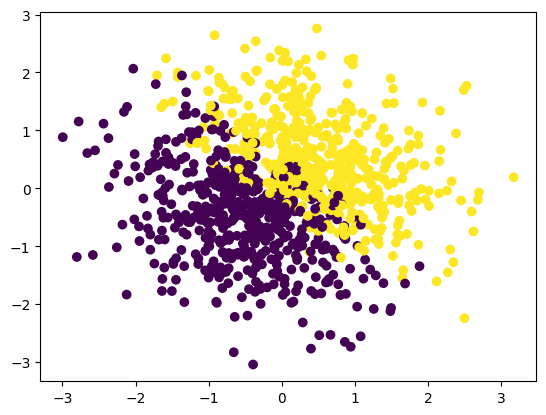

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [33]:
# Add intercept term
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [34]:
# Fit the model
beta, cost_history = mini_batch_gradient_descent_logistic(X_train, y_train)

In [35]:
# Make predictions
y_pred_prob = sigmoid(X_test @ beta)
y_pred = (y_pred_prob > 0.5).astype(int)

In [36]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Log Loss: {logloss:.4f}")

Accuracy: 0.9000
Log Loss: 0.1858


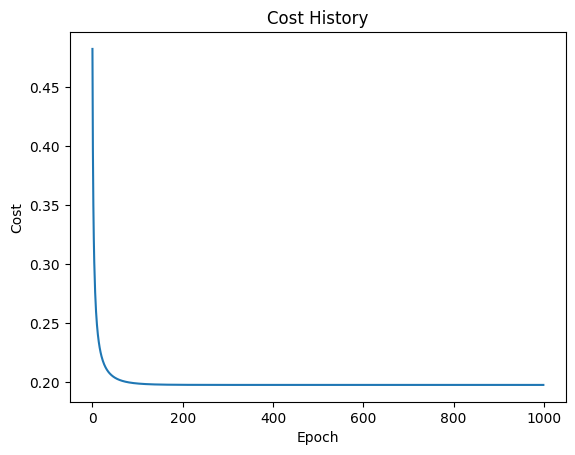

In [37]:
# Plot cost history
plt.plot(cost_history)
plt.title('Cost History')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

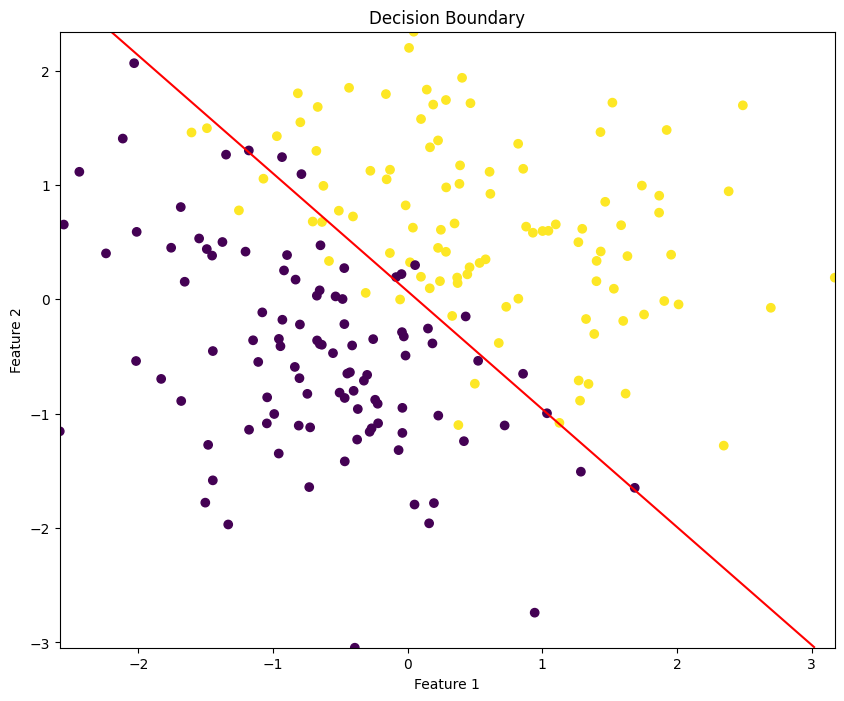

In [38]:
# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test, cmap='viridis')
x1_min, x1_max = X_test[:, 1].min(), X_test[:, 1].max()
x2_min, x2_max = X_test[:, 2].min(), X_test[:, 2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))
Z = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()] @ beta)
Z = Z.reshape(xx1.shape)
plt.contour(xx1, xx2, Z, [0.5], colors='r')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### <a id='toc3_4_'></a>[Interpreting the Results](#toc0_)


After running this code, we'll get:

1. The model's accuracy and log loss on the test set.
2. A plot of the cost history, showing how the cost decreases over epochs.
3. A visualization of the decision boundary on the test data.


A good fit is indicated by:
- High accuracy (close to 1) and low log loss on the test set
- A smoothly decreasing cost history that plateaus
- A decision boundary that clearly separates the two classes


💡 **Pro Tip:** If the cost doesn't decrease smoothly or the accuracy is low, try adjusting the learning rate or increasing the number of epochs.


### <a id='toc3_5_'></a>[Tuning Hyperparameters](#toc0_)


If the results aren't satisfactory, we can tune our hyperparameters:


In [41]:
learning_rates = [0.001, 0.01, 0.1, 1]
batch_sizes = [16, 32, 64, 128, 256, 512]

best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for bs in batch_sizes:
        beta, _ = mini_batch_gradient_descent_logistic(X_train, y_train, learning_rate=lr, batch_size=bs)
        y_pred = (sigmoid(X_test @ beta) > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'learning_rate': lr, 'batch_size': bs}

print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_accuracy:.4f}")

Best parameters: {'learning_rate': 0.1, 'batch_size': 16}
Best accuracy: 0.9000


This grid search helps find the best combination of learning rate and batch size.


### <a id='toc3_6_'></a>[Regularization in Practice](#toc0_)


To implement L2 regularization, we modify our gradient and cost functions:


```python
def compute_gradient_logistic_l2(X, y, beta, lambda_):
    n = X.shape[0]
    p = sigmoid(X @ beta)
    return (1/n) * X.T @ (p - y) + (lambda_ / n) * beta

def compute_cost_logistic_l2(X, y, beta, lambda_):
    n = X.shape[0]
    p = sigmoid(X @ beta)
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p)) / n + (lambda_ / (2*n)) * np.sum(beta**2)
```


Then we can run our algorithm with different lambda values to find the optimal regularization strength. Regularization helps prevent overfitting, especially when we have many features relative to the number of samples.


In conclusion, by implementing and running our logistic regression algorithm on real data, we can see how the theoretical concepts translate into practice. This hands-on approach allows us to understand the impact of different parameters and the importance of model evaluation and tuning.

## <a id='toc4_'></a>[Advantages and Limitations of Logistic Regression](#toc0_)

Logistic regression is a widely used classification algorithm in machine learning and statistics. Like any method, it has its strengths and weaknesses. Understanding these can help you decide when to use logistic regression and when to consider alternative approaches.


### <a id='toc4_1_'></a>[Advantages of Logistic Regression](#toc0_)


**Simplicity and Interpretability**

Logistic regression is one of the most interpretable classification algorithms.

- Easy to understand and explain to non-technical stakeholders
- Coefficients directly represent the impact of features on log-odds
- Allows for clear feature importance analysis


**Efficiency**

- Computationally inexpensive to train
- Performs well with a limited number of training examples
- Fast prediction times, suitable for real-time applications


**Probabilistic Output**

- Provides probabilities rather than just classifications
- Useful for risk assessment and decision-making scenarios


**Handles Multi-class Problems**

- Can be extended to multi-class classification through techniques like one-vs-rest or softmax regression


### <a id='toc4_2_'></a>[Limitations of Logistic Regression](#toc0_)


**Assumption of Linearity**

Logistic regression assumes a linear relationship between features and log-odds of the outcome.

- May not capture complex, non-linear relationships in the data
- Feature engineering or using polynomial terms may be necessary for better performance


**Limited Expressiveness**

- Cannot learn complex decision boundaries
- May underperform compared to more advanced algorithms on complex datasets

If logistic regression performs poorly, consider trying more complex models like random forests or neural networks.


**Vulnerability to Outliers**

- Sensitive to extreme values in the data
- Outliers can significantly impact the model's coefficients


**Assumes Independence of Features**

- Does not account for interactions between features unless explicitly modeled
- Can lead to poor performance when strong correlations exist between predictors


**Prone to Overfitting with High-Dimensional Data**

- Performance can degrade with a large number of features relative to the sample size
- Regularization techniques (L1, L2) are often necessary to mitigate this issue


### <a id='toc4_3_'></a>[When to Use Logistic Regression](#toc0_)


Logistic regression is particularly well-suited for scenarios where:

1. Interpretability is crucial (e.g., in healthcare or finance)
2. The relationship between features and log-odds of the outcome is approximately linear
3. You have a moderate-sized dataset with a reasonable number of features
4. You need probabilistic outputs for decision-making
5. Computational resources are limited


Understanding these pros and cons helps in choosing the right tool for your specific problem and data characteristics.


### <a id='toc4_4_'></a>[Alternatives to Consider](#toc0_)


When logistic regression's limitations become significant, consider these alternatives:

1. Decision Trees and Random Forests: For capturing non-linear relationships
2. Support Vector Machines: For handling high-dimensional data
3. Neural Networks: For complex, large-scale problems
4. Naive Bayes: When features are assumed to be independent


In conclusion, logistic regression remains a powerful and widely-used tool in the machine learning toolkit. Its simplicity, interpretability, and efficiency make it an excellent choice for many classification tasks. However, it's crucial to be aware of its limitations and assumptions. By understanding when to use logistic regression and when to consider alternatives, you can make informed decisions in your data science projects and ensure you're using the most appropriate tool for each specific problem.

## <a id='toc5_'></a>[Summary](#toc0_)

In this lecture series, we've explored the fundamental concepts of logistic regression, a powerful tool for binary classification problems. Let's recap the key points we've covered:

1. **Foundations**: We learned how logistic regression extends linear regression to handle binary outcomes using the logistic function.

2. **Mathematical Framework**: We delved into the mathematics behind logistic regression, including the concept of log-odds and maximum likelihood estimation.

3. **Model Fitting**: We implemented gradient descent for logistic regression and saw how to optimize the model parameters.

4. **Interpretation**: We discussed how to interpret logistic regression coefficients and odds ratios, crucial for understanding feature importance.

5. **Practical Application**: We applied logistic regression to real data, demonstrating its use in solving actual classification problems.

6. **Advantages and Limitations**: We explored the strengths and weaknesses of logistic regression, understanding when it's an appropriate choice and when to consider alternatives.


While we've touched on basic evaluation metrics like accuracy, there's much more to explore in the realm of classification evaluation:

- We'll dive deep into metrics such as precision, recall, and F1-score.
- We'll explore the ROC curve and AUC for assessing classifier performance.
- We'll discuss how to choose appropriate metrics based on the problem context.

💡 **Pro Tip:** Different classification metrics are suitable for different scenarios, especially when dealing with imbalanced datasets.


Logistic regression naturally extends to problems beyond binary classification:

1. **Multiclass Classification**: We'll explore techniques like one-vs-rest and multinomial logistic regression for handling problems with more than two classes.

2. **Multilabel Classification**: We'll discuss how to approach problems where each instance can belong to multiple classes simultaneously.

🤔 **Why This Matters:** Many real-world problems involve multiple categories or overlapping labels. Understanding these extensions will significantly broaden your classification toolkit.


In conclusion, logistic regression is more than just a standalone algorithm; it's a gateway to understanding broader machine learning concepts. As we move forward, we'll build upon this knowledge to tackle more complex classification problems and evaluation techniques. The journey into the world of machine learning is just beginning, and logistic regression has provided us with a solid starting point for the exciting concepts that lie ahead.